# Get Data from Hive

First we load the two tables 'training.weather' and 'training.stations' from Hive using the sqlContext.table method. This will create DataFrames encapsulating the Hive tables.

In [2]:
# Get table 'training.weather' from Hive and store it in the variable weather
weather = sqlContext.table('training.weather')
# Get table 'training.stations' from Hive and store it in the variable stations
stations = sqlContext.table('training.stations')

# Process Data

Now we want to perform a simple analysis on the data: Calculate minimum and maximum wind speed and air temperature per country and year. This needs to be performed in three steps:

1. Join weather data and stations on the columns 'usaf' and 'wban'
2. Group the data by the relevant columns year and country
3. Perform min/max aggregations. Also pay attentions to the fields air_temperature_qual and wind_speed_qual

In [5]:
from pyspark.sql.functions import *

df = weather.join(stations, (weather.usaf == stations.usaf) & (weather.wban == stations.wban))
result = df.groupBy(df.country, df.year).agg(
        min(when(df.air_temperature_qual == lit(1), df.air_temperature).otherwise(9999)).alias('min_temp'),
        max(when(df.air_temperature_qual == lit(1), df.air_temperature).otherwise(-9999)).alias('max_temp'),
        min(when(df.wind_speed_qual == lit(1), df.wind_speed).otherwise(9999)).alias('min_wind'),
        max(when(df.wind_speed_qual == lit(1), df.wind_speed).otherwise(-9999)).alias('max_wind')
    )

pdf = result.toPandas()    
pdf

,country,year,min_temp,max_temp,min_wind,max_wind
0,SW,2014,-34.5,28.9,1.0,16.0
1,AS,2014,0.9,45.6,0.0,14.4
2,IT,2014,-6.8,24.0,0.0,20.6
3,CA,2014,-43.6,35.9,0.0,26.8
4,BE,2014,-7.0,33.1,0.0,16.0
5,UK,2014,-6.0,30.4,0.0,20.6
6,EZ,2014,-15.0,33.0,0.0,16.5
7,NL,2014,-9.0,35.0,0.0,27.3
8,SC,2014,20.0,32.0,0.0,30.4
9,JA,2014,-0.5,33.9,0.0,19.6


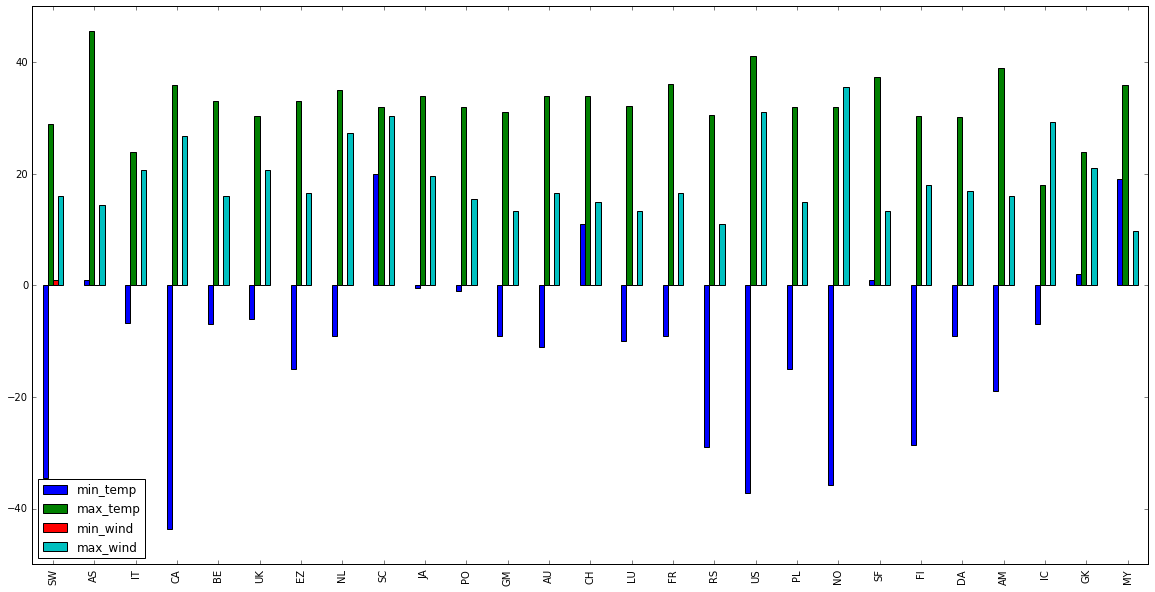

In [25]:
%matplotlib inline
p = pdf.plot(kind='bar',figsize=(20,10), xticks=pdf.index)
p.set_xticklabels(pdf['country'])